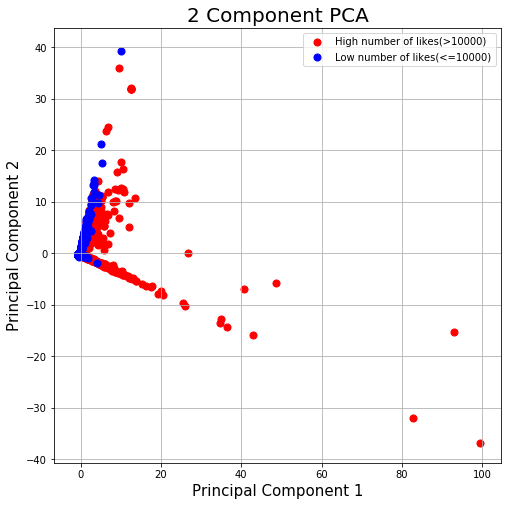

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read combined.csv file
columns = ["trendingRank", "videoCategoryId", "videoViews", "videoLikes", "videoDislikes", 
           "videoCommentCount", "channelSubsCount", "channelVideoCount", "dayDifference", "publishedZTimeFloat", "publishedDayOfWeek"]
dataset = pd.read_csv('oldAndNewOnlyEnglish_noDuplicatesWithLikesAndComments.csv', usecols = columns) 
videoLikes = dataset["videoLikes"]
videoLikes.values[videoLikes > 10000] = 1
videoLikes.values[videoLikes > 1] = 0
# dataset.head()
# print(len(videoLikes))

# Standardize data
features = ["trendingRank", "videoCategoryId", "videoViews", "videoDislikes", 
           "videoCommentCount", "channelSubsCount", "channelVideoCount", "dayDifference", "publishedZTimeFloat", "publishedDayOfWeek"]
x = dataset.loc[:, features].values
y = dataset.loc[:,["videoLikes"]].values
x = StandardScaler().fit_transform(x)

# Applying PCA 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dataset["videoLikes"]], axis = 1)
finalDf.head(5)

# plot data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targetLabel = ['High number of likes(>10000)', 'Low number of likes(<=10000)']
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["videoLikes"] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targetLabel)
ax.grid()


In [10]:
pd.DataFrame(data = x, columns = features).head(10)

,trendingRank,videoCategoryId,videoViews,videoDislikes,videoCommentCount,channelSubsCount,channelVideoCount,dayDifference,publishedZTimeFloat,publishedDayOfWeek
0,-0.229821,-0.115524,0.083403,0.069679,1.836789,-0.119677,-0.070047,-0.078168,-1.704685,1.558949
1,-0.229821,0.479801,-0.069517,-0.066797,0.553144,-0.119677,-0.070047,-0.078168,1.222868,1.558949
2,-0.229821,0.628632,0.010935,0.149308,0.354714,-0.119677,-0.070047,-0.091510,-0.953133,-1.056484
3,-0.229821,0.330970,-0.102933,-0.054590,0.245050,-0.119677,-0.070047,-0.091510,-1.867256,-1.056484
4,-0.229821,1.075125,0.228016,0.299677,0.207380,-0.119677,-0.070047,-0.071497,0.657578,1.035863
5,-0.229821,-1.603835,0.678719,0.278072,0.177444,-0.119677,-0.070047,-0.078168,0.397300,1.558949
6,-0.229821,-0.859679,-0.164389,-0.079720,0.091937,-0.119677,-0.070047,-0.091510,-0.395051,-1.056484
7,-0.229821,1.075125,-0.068360,-0.040595,0.091763,-0.119677,-0.070047,-0.084839,0.892052,-1.579570
8,-0.229821,0.628632,-0.135761,-0.063886,0.090981,-0.119677,-0.070047,-0.084839,-0.402382,-1.579570
9,-0.229821,0.330970,-0.044510,0.164375,0.090633,-0.119677,-0.070047,-0.078168,0.742612,1.558949


In [3]:
pca.explained_variance_ratio_

array([0.29227606, 0.24941395])

In [12]:
finalDf["videoLikes"].head(12)

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     1
9     1
10    1
11    1
Name: videoLikes, dtype: int64

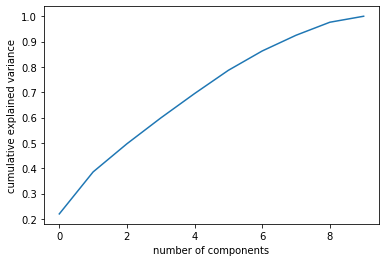

In [13]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');